## Introduction
This is a classification project on 4 different cardiac ailments. The data is labeled, but we will first attempt an unsupervised learning approach. Then a supervised learning approach will be tried and compared to the unsupervised models. 

## The Data
The dataset comes from Kaggle at this link: https://www.kaggle.com/datasets/akki2703/ecg-of-cardiac-ailments-dataset

The dataset features were obtained from ECGs from 4 different sources: MIT-BIH Arrhythmia Database, the other is BIDMC Congestive Heart Failure Database and MIT-BIH Atrial Fibrillation Database and finally MIT-BIH Normal Sinus Rhythm Database. The data has 1200 samples and 56 columns (including the target variable).

We will look into the properties of the data below:

In [28]:
#import all necessary libraries
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
import math

In [29]:
#read in data to df
data = pd.read_csv("ECGCvdata.csv")

#show the info of dataframes and sample of train data
data.info()

data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   431 non-null    float64
 13  RStoQSdur   431 non-null    float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis     1200 non-null  

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,91.392000,0.051353,0.062500,0.019150,0.010051,0.118045,0.009099,0.098895,0.086557,...,84.181251,0.000000,0.220347,-0.195477,NaN,NaN,0.064196,0,0.000000,NSR
1196,1197,61.440000,0.057355,0.061547,0.061261,0.031345,0.134099,0.029916,0.072837,0.090987,...,124.648975,8.243245,22.692888,-0.111698,0.255964,-0.278531,0.112012,0,0.000000,NSR
1197,1198,93.322709,0.058927,0.109137,0.080936,0.040301,0.168112,0.040635,0.087176,0.088081,...,82.427729,7.623618,22.380510,-0.045271,0.247145,-0.259303,0.064318,1,0.613497,NSR
1198,1199,63.744000,0.061500,0.101277,0.081793,0.041159,0.145913,0.040635,0.064120,0.081174,...,120.230064,8.614011,22.993533,-0.052626,0.263921,-0.280417,0.113422,9,5.521472,NSR


There are multiple columns that have a significant number of null values. We will remove all columns that have >25% null values, and then check to see if any remaining columns have null values.

In [30]:
#drop columns that have > 25% null values
dropnum = len(data) * 0.75
data_dp = data.dropna(thresh = dropnum, axis = 1)

#print df info
data_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  RRmean      1200 non-null   float64
 13  PPmean      1200 non-null   float64
 14  PQdis       1200 non-null   float64
 15  PonQdis     1200 non-null   float64
 16  PRdis       1200 non-null   float64
 17  PonRdis     1200 non-null   float64
 18  PSdis       1200 non-null   float64
 19  PonSdis     1200 non-null  

There are no more null values! The remaining columns are all type float or int so we also know there are no null values signified by a string. The first column is the record column and is redudant to the index. We will drop the record column and split the data to X (feature matrix) and y (target).

In [31]:
#drop record column, redudant to index
data_dp = data_dp.drop("RECORD", axis = 1)

#set X to all the features and y to the ailment/category/ECG_signal
X = data_dp.iloc[:,:45]
y = data_dp.loc[:,"ECG_signal"]
X

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,...,IBIM,IBISD,SDSD,RMSSD,QRSarea,QRSperi,PQslope,STslope,NN50,pNN50
0,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,0.301905,...,291.794118,17.389965,27.158481,292.296636,18.457618,63.615239,-0.014364,0.012606,2,5.882353
1,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,0.289670,...,318.387097,10.787886,9.665517,318.563915,23.043230,67.787773,-0.021207,0.016175,1,3.225806
2,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,0.219088,...,259.763158,85.647434,111.816694,273.165412,10.756353,29.253827,-0.042542,0.027131,16,42.105263
3,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,0.296962,...,312.838710,11.604875,11.193252,313.046941,23.845086,65.228737,-0.017806,0.017022,2,6.451613
4,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,0.296345,...,260.783784,36.264564,60.245998,263.225676,20.942791,72.830353,-0.016650,0.016191,2,5.405405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,91.392000,0.051353,0.062500,0.019150,0.010051,0.118045,0.009099,0.098895,0.086557,0.180545,...,79.368098,5.009289,2.188401,84.181251,0.000000,0.220347,-0.195477,0.064196,0,0.000000
1196,61.440000,0.057355,0.061547,0.061261,0.031345,0.134099,0.029916,0.072837,0.090987,0.195646,...,98.460123,18.528265,3.254416,124.648975,8.243245,22.692888,-0.111698,0.112012,0,0.000000
1197,93.322709,0.058927,0.109137,0.080936,0.040301,0.168112,0.040635,0.087176,0.088081,0.277248,...,78.079755,8.120195,3.141910,82.427729,7.623618,22.380510,-0.045271,0.064318,1,0.613497
1198,63.744000,0.061500,0.101277,0.081793,0.041159,0.145913,0.040635,0.064120,0.081174,0.247189,...,99.208589,15.473730,5.647497,120.230064,8.614011,22.993533,-0.052626,0.113422,9,5.521472


## Exploratory Data Analysis

<Axes: >

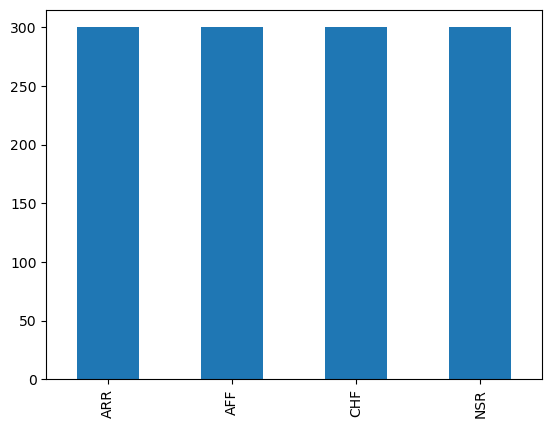

In [32]:
#histogram for Category column
y.value_counts().plot(kind='bar')

The 4 ailments are perfectly balanced in the data set with 300 of each.

Next, we will look at histograms of 4 random features.

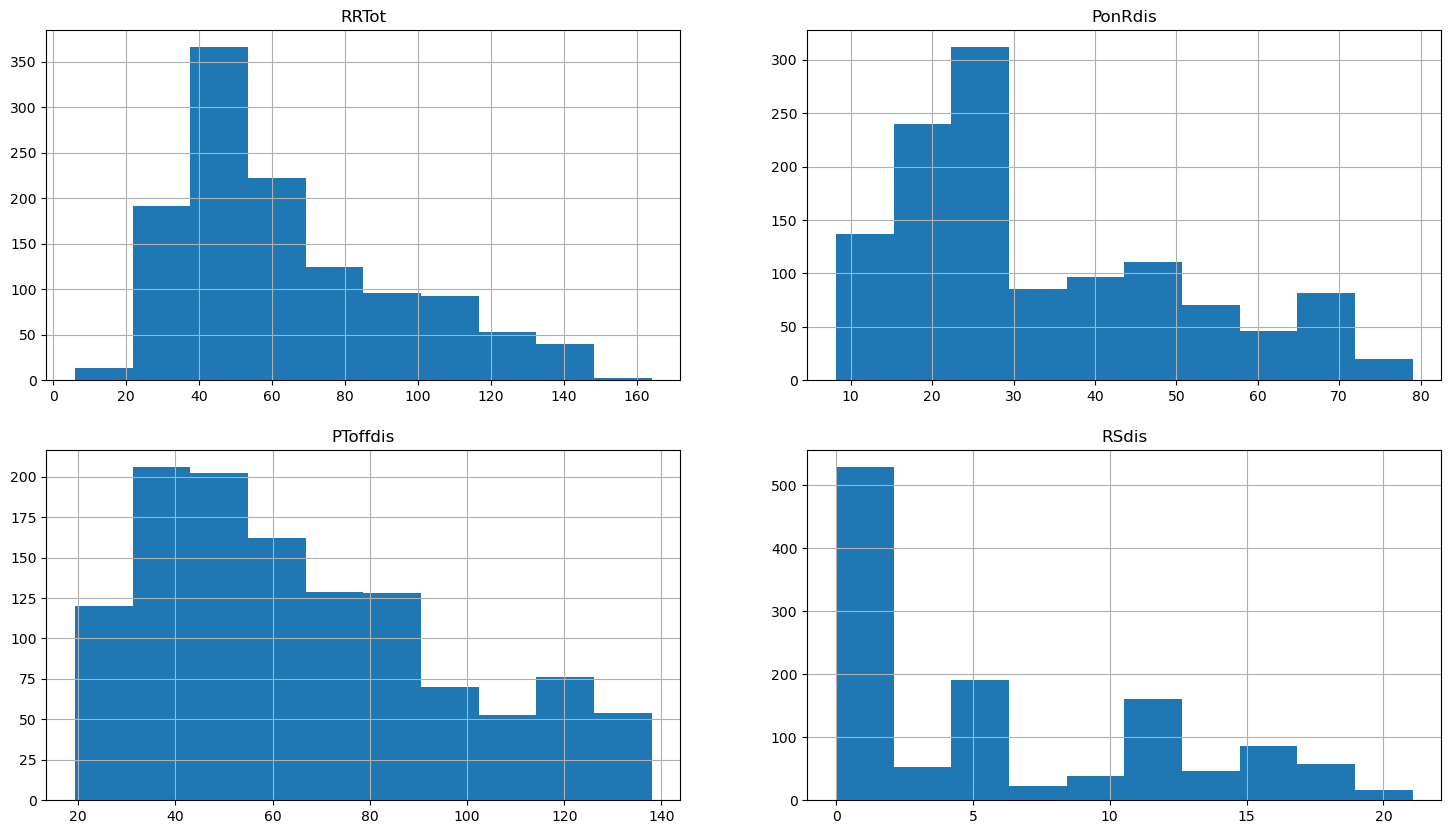

In [33]:
#randomly sample 4 variables to plot histograms of
random.seed(a= 875)
random_features = random.sample(X.columns.tolist(),4)
random_features

#Create histograms
#make figure of 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
i = 0
j = 0

#plot histograms on subplots
for feat in random_features:
    X[feat].hist(ax=axes[i,j])
    axes[i,j].set_title(feat)
    if i == 0 and j == 0:
        j += 1
    elif i == 0 and j == 1:
        i += 1
        j -= 1
    elif i == 1 and j == 0:
        j += 1

All of the histograms seem reasonable and are at least slightly right-skewed. 

Next we will look at boxplots of the same features separated by cardiac ailment (ECG_signal).

<Axes: xlabel='ECG_signal', ylabel='RSdis'>

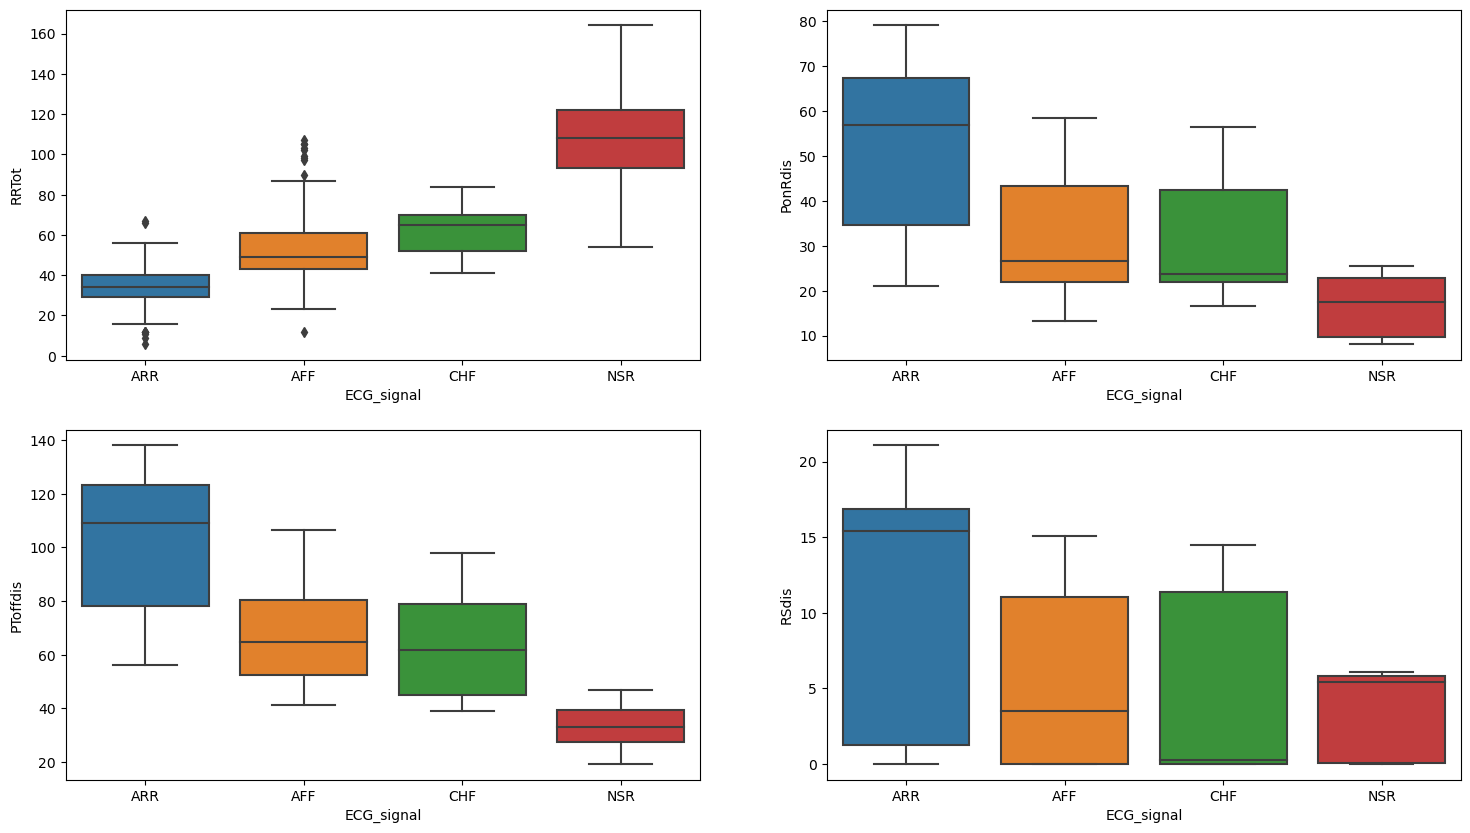

In [34]:
#Create boxplot for the 4 random features
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
 
sns.boxplot(ax=axes[0, 0], x = 'ECG_signal', y = random_features[0] , data = data_dp)
sns.boxplot(ax=axes[0, 1], x = 'ECG_signal', y = random_features[1] , data = data_dp)
sns.boxplot(ax=axes[1, 0], x = 'ECG_signal', y = random_features[2] , data = data_dp)
sns.boxplot(ax=axes[1, 1], x = 'ECG_signal', y = random_features[3] , data = data_dp)

These boxplots show that these variables should be able to help us differentiate between the different ailments by the lack of overlap between the boxes. NSR has the least amount of overlap, and AFF and CHF have the most overlap together and may be difficult to differentiate. There do not appear to be many potential outliers from the boxplot. 

Now we will look at a pairplot and correlation matrix for the first 10 features.

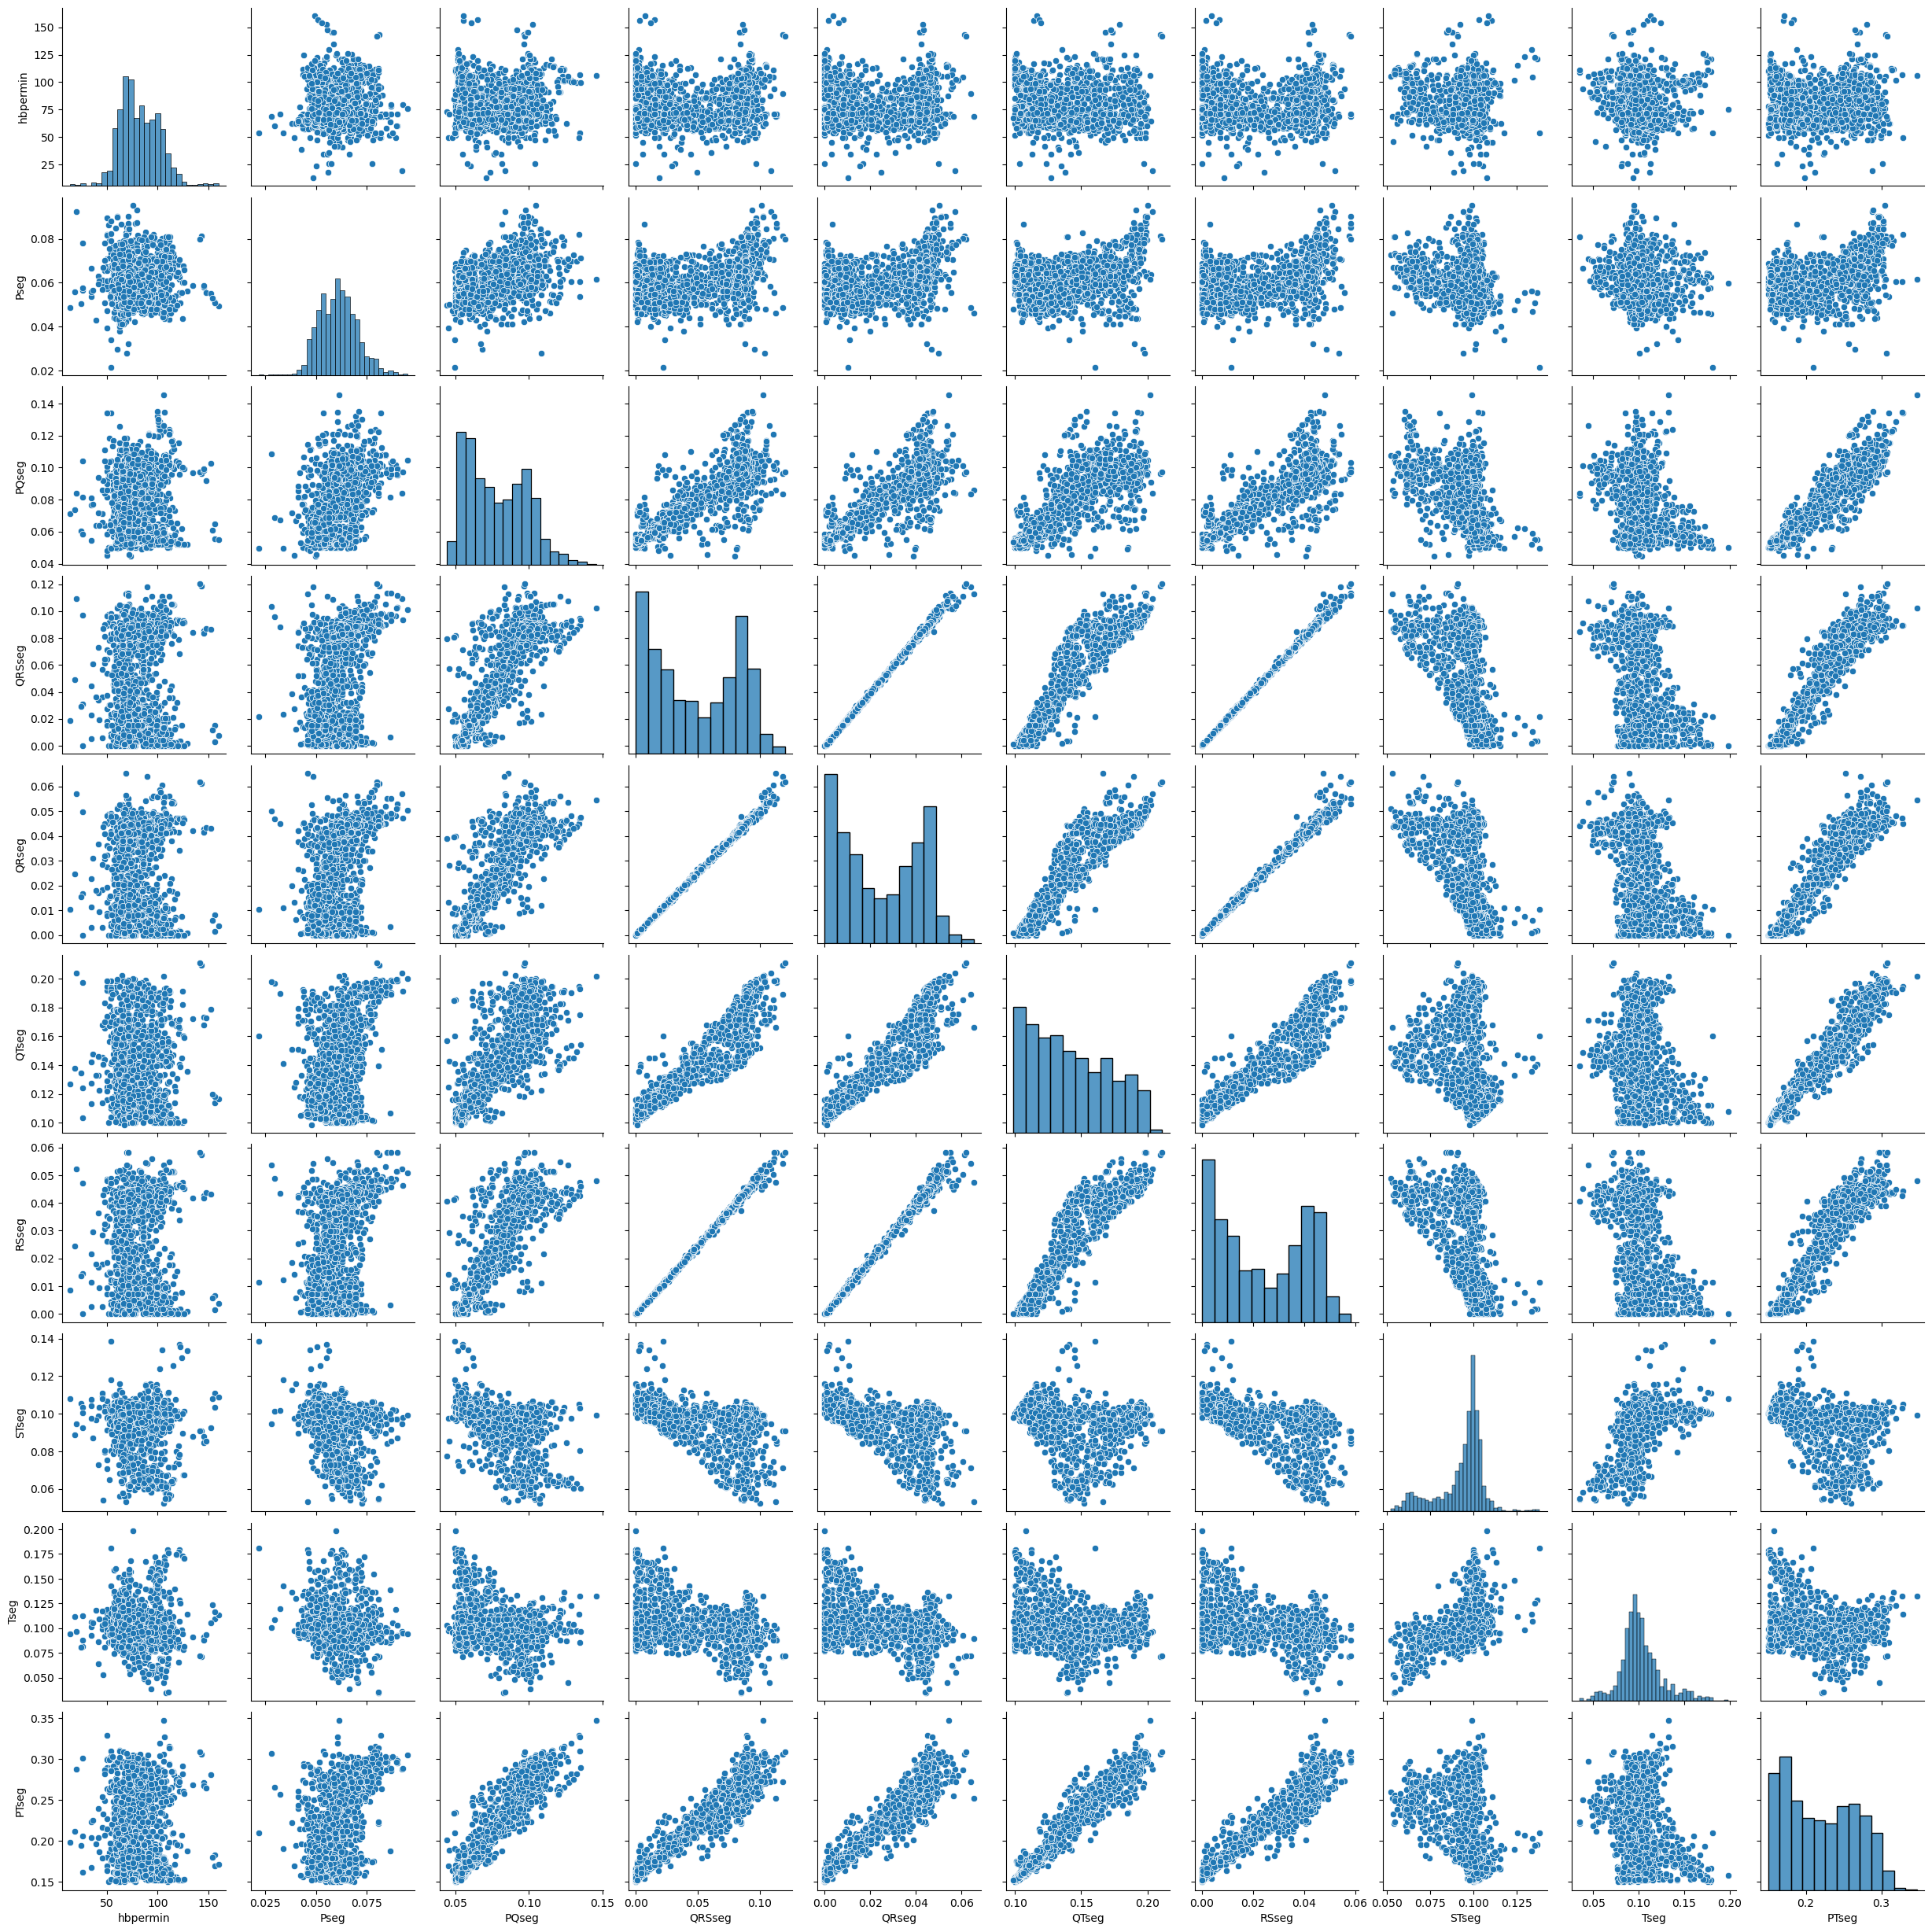

In [35]:
#make df with first 10 features
X_10 = X.iloc[:,:10]

#create pairplot
sns.pairplot(X_10)

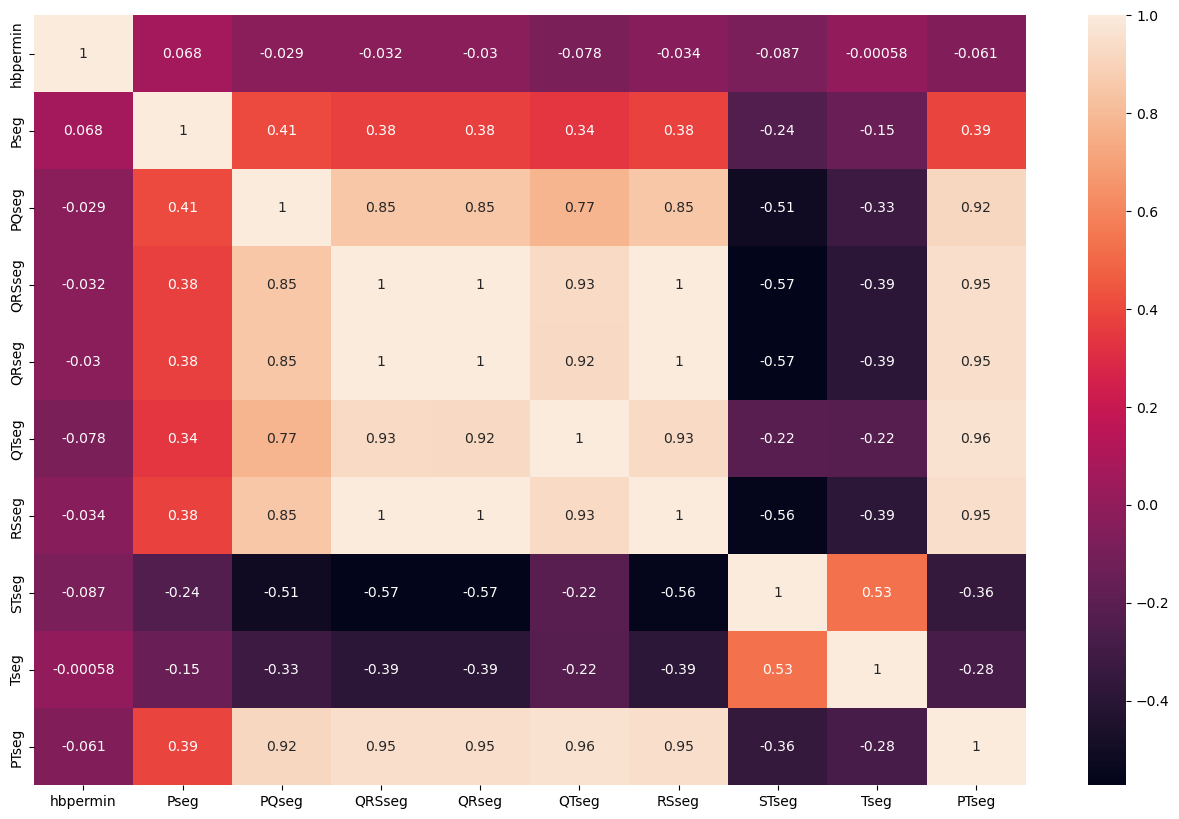

In [36]:
#create correlation matrix
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)
corr_matrix = X_10.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

There are some highly correlated features! QRSseg and QRseg have a coorelation of 1, and both of them have a correlation of 1 with RSseg. These high correlations could cause issues depending on the models we train, so we may have to do dimensionality reduction to eliminate the highly correlated features. 

## Models
### Unsupervised Models
We will first build unsupervised models and use them to make predictions on our data. 

The first two code blocks are functions. The label permutation function will find which categories correspond to what numerical label from the unsupervised learning predictions.

In [37]:
def label_permute_compare(ytdf,yp):
    """
    ytdf: true labels dataframe
    yp: predicted labels
    Returns permuted label order that provides highest accuracy. 
    """
    #initialize variables
    i = 0
    high_acc = 0
    high_perm = None
    
    #get unique categories
    categories =  ytdf.unique().tolist()
    
    #go through all permutations of categories
    for perm in itertools.permutations(categories, len(categories)):
        #change prediction to this permutation of values
        yp_perm = [perm[yp[i]] for i in range(len(yp))]
        
        #check accuracy of the predictions
        accuracy = accuracy_score(ytdf,yp_perm)

        #if accuracy greater than current high_acc, set as new high_acc and perm
        if accuracy > high_acc:
            high_acc = accuracy
            high_perm = perm
            
    return high_perm, round(high_acc,3)


In [38]:
def make_prediction(yp, ytdf, nmf=0):
    """
    yp: predicted labels (numerical)
    ytdf: true labels dataframe (string)
    Returns the predicted values as strings, and the label
    dictionary for tranforming from int to string
    """ 
    #if matrix factorization, get prediction by getting index of max number in row
    if nmf == 1:
        yp = np.argmax(yp, axis = 1)

    #find label order for predictions that results in highest accuracy
    labelorder, acc = label_permute_compare(ytdf, yp)

    #turn labelorder into a dictionary
    label_dict = { indx: val for indx, val in enumerate(list(labelorder))}
    print(label_dict)

    yp = [label_dict[ele] for ele in yp]
    
    return yp, label_dict

We will scale the data and then split to training and test sets.

In [39]:
#Scale the columns and set to dataframe
scl = StandardScaler()
X_trf = scl.fit_transform(X)
X_scl = pd.DataFrame(X_trf, columns = scl.get_feature_names_out())
X_scl

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,...,IBIM,IBISD,SDSD,RMSSD,QRSarea,QRSperi,PQslope,STslope,NN50,pNN50
0,-0.360748,1.651560,1.548106,1.155387,1.093776,1.762090,1.216354,0.859838,1.229249,1.775238,...,1.490663,-0.311503,-0.145021,0.827463,1.276148,1.584182,1.152943,-1.098607,-0.573580,-0.216077
1,-0.693224,1.225566,0.909131,1.319086,1.247886,1.778306,1.389567,0.469942,-0.600613,1.511219,...,1.817346,-0.436107,-0.310552,1.061480,1.818869,1.750684,1.015197,-0.963655,-0.702692,-0.473476
2,0.082553,1.084941,0.427908,-0.251419,-0.334276,-0.310224,-0.166596,-0.026608,-0.366156,-0.011909,...,1.097177,0.976754,0.656074,0.657021,0.364681,0.213009,0.585793,-0.549345,1.233988,3.293647
3,-0.693224,2.318767,1.511444,1.216327,1.188340,1.617844,1.242935,0.385263,-0.639048,1.668571,...,1.749187,-0.420688,-0.296096,1.012329,1.913770,1.648567,1.083658,-0.931642,-0.573580,-0.160920
4,0.009630,1.043285,1.233489,1.524078,1.427829,1.785970,1.619760,-0.046018,-0.741611,1.655261,...,1.109715,0.044727,0.168076,0.568468,1.570276,1.951905,1.106921,-0.963052,-0.573580,-0.262290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.491710,-1.010578,-0.784327,-0.839843,-0.822359,-0.804318,-0.856340,0.419580,-0.715404,-0.843660,...,-1.118897,-0.545170,-0.381306,-1.026651,-0.908364,-0.945555,-2.492366,0.852240,-0.831804,-0.786032
1196,-1.058898,-0.375361,-0.832231,0.376033,0.394880,-0.254765,0.356239,-1.535746,-0.519242,-0.517786,...,-0.884360,-0.290019,-0.371218,-0.666121,0.067248,-0.048801,-0.806126,2.660421,-0.831804,-0.786032
1197,0.591663,-0.208994,1.560572,0.944084,0.906829,0.909568,0.980565,-0.459781,-0.647907,1.243165,...,-1.134724,-0.486456,-0.372283,-1.042273,-0.006087,-0.061267,0.530870,0.856847,-0.702692,-0.726589
1198,-0.939620,0.063242,1.165364,0.968842,0.955845,0.149653,0.980565,-2.189904,-0.953751,0.594501,...,-0.875165,-0.347669,-0.348573,-0.705490,0.111129,-0.036804,0.382829,2.713740,0.330204,-0.251044


In [40]:
#split to training and testing sets
X_og_train, X_og_test, X_train, X_test, y_train, y_test = train_test_split(X, X_scl, y, random_state=8764,test_size=0.25)

In [41]:
#create variables to hold classifier type and metric scores for all models trialed
#will use these to show results in table in results section
mod = []
mod_train_acc = []
mod_test_acc = []
mod_desc = []

In [42]:
#Apply PCA to data to reduce dimensionality to 2 to allow for easy visualization
X2_train = pd.DataFrame(PCA(n_components=2).fit_transform(X_train),columns=['PC1','PC2'])

ward euclidean 0.666
complete euclidean 0.407
complete l1 0.411
complete l2 0.407
complete manhattan 0.411
complete cosine 0.592
average euclidean 0.258
average l1 0.267
average l2 0.258
average manhattan 0.267
average cosine 0.464
single euclidean 0.259
single l1 0.259
single l2 0.259
single manhattan 0.259
single cosine 0.257
ward euclidean  Accuracy:  0.666


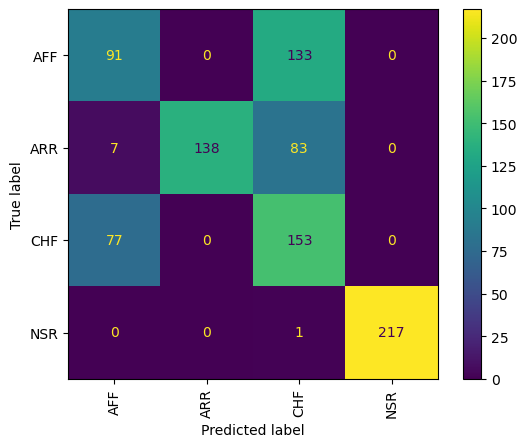

In [43]:
#Start with Hierarchical clustering
# programmatically evaluate which linkage method and distance metric lead to the best performance
#initialize variables
best_acc = 0
best_labelorder = None
best_link = None
best_metric = None
best_model = None
n=4

#loop through all options for "link"
for link in ['ward', 'complete', 'average', 'single']:
    #Loop through all options for "metric"
    for metric in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
        #the link 'ward' is only available with metric 'euclidean'
        if link == 'ward':
            if metric == 'euclidean':
                model = AgglomerativeClustering(n_clusters = n, metric = metric, linkage = link).fit(X_train)
                labelorder, acc = label_permute_compare(y_train, model.labels_)
            #skip if other metric
            else:
                acc = 0
        #for all other links, go through all metrics
        else:
            model = AgglomerativeClustering(n_clusters = n, metric = metric, linkage = link).fit(X_train)
            labelorder, acc = label_permute_compare(y_train, model.labels_)
        #print link, metric, and the accuracy for each model
        if acc > 0:
            print(link, metric, acc)
        #if new model's accuracy is > than current best accuracy, update best variables
        if acc > best_acc:
            best_acc = acc
            best_labelorder = labelorder
            best_model = model
            best_link = link
            best_metric = metric

#print the best model's parameters and accuracy
print(best_link, best_metric," Accuracy: ", best_acc)

#retrieve labels from best model
yp_labels = [best_labelorder[best_model.labels_[i]] for i in range(len(best_model.labels_))]

#make confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train,yp_labels,xticks_rotation='vertical')
plt.show

#Add details to variables for results table
mod.append("Hierarchical Clustering")
mod_desc.append("Original")
mod_train_acc.append(best_acc)
mod_test_acc.append("N/A")

{0: 'ARR', 1: 'NSR', 2: 'CHF', 3: 'AFF'}
Train Accuracy:  0.6788888888888889
Test Accuracy:  0.68


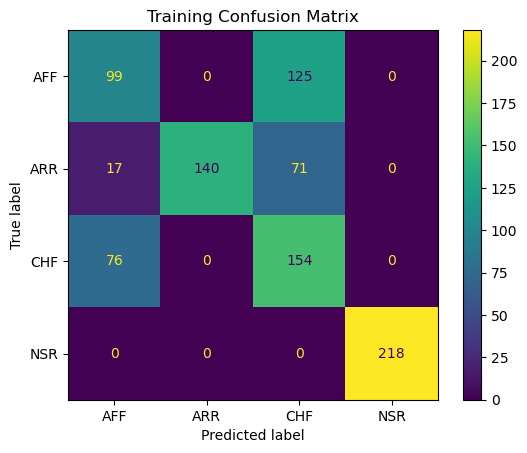

In [44]:
#Fit k-means clustering
kcluster = KMeans(n_clusters = 4, n_init = 10,init = 'k-means++').fit(X_train)

#find which numerical labels from clustering go to which cardiac ailment 
yp_train, label_dict = make_prediction(kcluster.labels_, y_train)
acc = accuracy_score(y_train,yp_train)
print("Train Accuracy: ", acc)

#find test accuracy
yp_test = kcluster.predict(X_test)
yp_test = [label_dict[ele] for ele in yp_test]
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#make confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train,yp_train)
plt.title('Training Confusion Matrix')
plt.show

#Add details to variables for results table
mod.append("K-Means Clustering")
mod_desc.append("Original")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

{0: 'CHF', 1: 'AFF', 2: 'ARR', 3: 'NSR'}
Train Accuracy:  0.7566666666666667
Test Accuracy:  0.7633333333333333


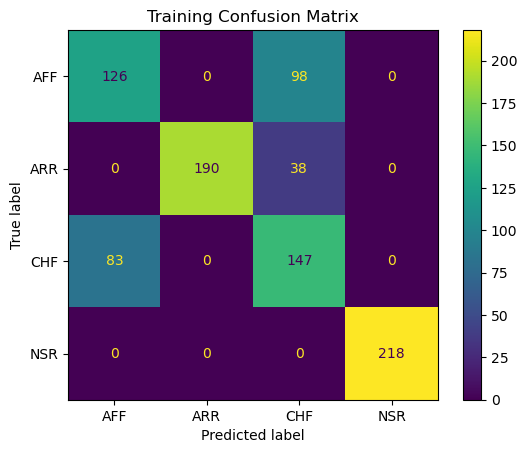

In [45]:
#expectation-maximization clustering
gmcluster = GaussianMixture(n_components=4, covariance_type='full',n_init = 10).fit(X_train)

#find which numerical labels from clustering go to which cardiac ailment 
yp_train = gmcluster.predict(X_train)
yp_train, label_dict = make_prediction(yp_train, y_train)
acc = accuracy_score(y_train,yp_train)
print("Train Accuracy: ", acc)

#make confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train,yp_train)
plt.title('Training Confusion Matrix')
plt.show

#find test accuracy
yp_test = gmcluster.predict(X_test)
yp_test = [label_dict[ele] for ele in yp_test]
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#Add details to variables for results table
mod.append("Gaussian Mixture")
mod_desc.append("Original")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

Hierarchical clustering, k-means clustering, and Gaussian mixture gave similar results with Gaussian mixture producing the best results.

For all 3 of the models: NSR is almost always identified correctly. ARR is identified well in hierarchical and k-menas, and very well in Gaussian mixture. The two labels the models struggle with are CHF and AFF. They are misidentified as each other ~40% to 45% of the time. 

This possibility was observed in our boxplots from our exploratory data analysis section. The NSR boxplots had the least amount of overlap with the others, then ARR had the next least. The boxplots for AFF and CHF were very similar and this shows in our results with the models struggling to differentiate them. 

The visualization below shows the top two Principal Components with the shape determined by the actual labels and the color determined by the predicted labels. This vizualization shows that NSR is distinct in the bottom left corner, and ARR is mostly clustered together in the top right area. The middle band of points is a mixture of CHF and AFF and there is no clear distinction that can be made between them. This is why our clustering models are having trouble correctly predicting them. 

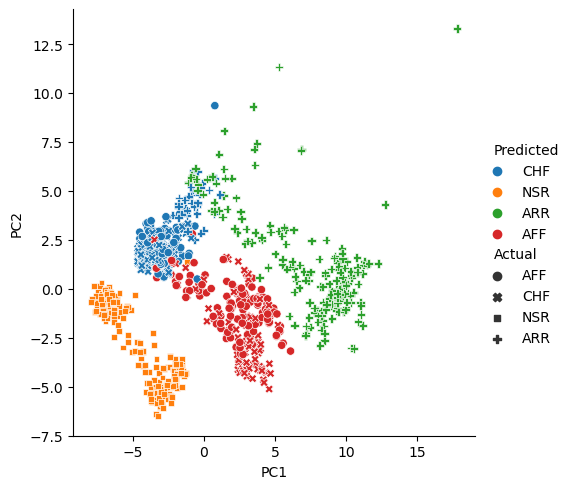

In [46]:
#Put actual and predicted labels into data frame
X2_train['Actual'] = y_train.values
X2_train['Predicted'] = yp_train

#Plot the top 2 PCs and shape and color based on labels
sns.relplot(data = X2_train, x = 'PC1', y = 'PC2', hue = 'Predicted', style = 'Actual')

Next, we will fit a non-negative matrix factorization (NMF). We have some negative variables, but all vairables that have negatives values, have all negative values. So, we will apply absolute value to all columns and the magnitudes and differences within columns will be preserved.

This is an unusual application type for NMF, but we are trying it just to see the results it gives.

In [47]:
#apply abs value to each column
X_og_abs_train = X_og_train.apply(abs)

In [48]:
#create NMF model and transform
model = NMF(n_components = 4, random_state=0, beta_loss = 'frobenius', solver = 'mu')
W = model.fit_transform(X_og_abs_train)

#Make predictions from model
yp_train, label_dict = make_prediction(W, y_train, nmf = 1)
acc = accuracy_score(y_train,yp_train)
print("Train Accuracy: ", acc)

#transform test data and check accuracy
W_test = model.transform(X_og_test.apply(abs))
yp_test = [label_dict[ele] for ele in np.argmax(W_test, axis = 1)]
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#Add details to variables for results table
mod.append("Non-negative Matrix Factorization")
mod_desc.append("Original")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

{0: 'AFF', 1: 'NSR', 2: 'ARR', 3: 'CHF'}
Train Accuracy:  0.5722222222222222
Test Accuracy:  0.54


The NMF model provides worse results than the clustering models.

Clustering algortihms can stuggle with high dimension datasets. Our dataset does not have a humungous number of features, but there are a decent quantity. So, we will try to apply PCA on the dataset and then fit clustering models to see if improves the results. 

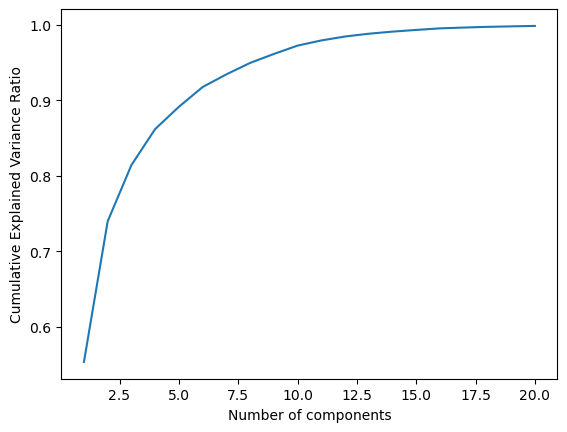

In [49]:
#PCA on X_train
pca = PCA(n_components=20).fit(X_train)
evr = pca.explained_variance_ratio_

#plot expalined variance
plt.plot(range(1,21),np.cumsum(evr))
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance Ratio")

#get 95% explained variance ratio
#n will get number of components where cummulative sum is
# less than 0.95. We want one extra to be over 0.95
n = sum(np.cumsum(evr) < 0.95) + 1

#make reduced x_train and x_test with n components
pca = PCA(n_components=n).fit(X_train)
x_reduced = pd.DataFrame(pca.transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))
#x_reduced

In [50]:
#expectation-maximization clustering
gmcluster = GaussianMixture(n_components=4, covariance_type='full',n_init = 10).fit(x_reduced)

#find which numerical labels from clustering go to which cardiac ailment 
yp_train = gmcluster.predict(x_reduced)
yp_train, label_dict = make_prediction(yp_train, y_train)
acc = accuracy_score(y_train,yp_train)
print("Train Accuracy: ", acc)

#find test accuracy
yp_test = gmcluster.predict(X_test_reduced)
yp_test = [label_dict[ele] for ele in yp_test]
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#Add details to variables for results table
mod.append("Gaussian Mixture")
mod_desc.append("Dimensionality Reduction - PCA")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

{0: 'ARR', 1: 'CHF', 2: 'AFF', 3: 'NSR'}
Train Accuracy:  0.49444444444444446
Test Accuracy:  0.5166666666666667


In [51]:
#Fit k-means clustering
kcluster = KMeans(n_clusters = 4, n_init = 10,init = 'k-means++').fit(x_reduced)

#find which numerical labels from clustering go to which cardiac ailment 
yp_train, label_dict = make_prediction(kcluster.labels_, y_train)
acc = accuracy_score(y_train,yp_train)
print("Train Accuracy: ", acc)

#find test accuracy
yp_test = kcluster.predict(X_test_reduced)
yp_test = [label_dict[ele] for ele in yp_test]
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#Add details to variables for results table
mod.append("K-Means Clustering")
mod_desc.append("Dimensionality Reduction - PCA")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

{0: 'ARR', 1: 'CHF', 2: 'AFF', 3: 'NSR'}
Train Accuracy:  0.6788888888888889
Test Accuracy:  0.68


The clustering models on the PCA reduced dataset gave the same results for k-means clustering and worse results for Gaussian Mixture.

In the original models, two of the ailments had good prediction results (NSR and ARR), and two had poor prediction results (CHF and AFF). Since CHF and AFF were misidentified so many times, what if they were combined and then the model just had to distinguish between the 3 options?

{0: 'NSR', 1: 'ARR', 2: 'CHF'}
Train Accuracy:  0.7288888888888889
Test Accuracy:  0.7233333333333334


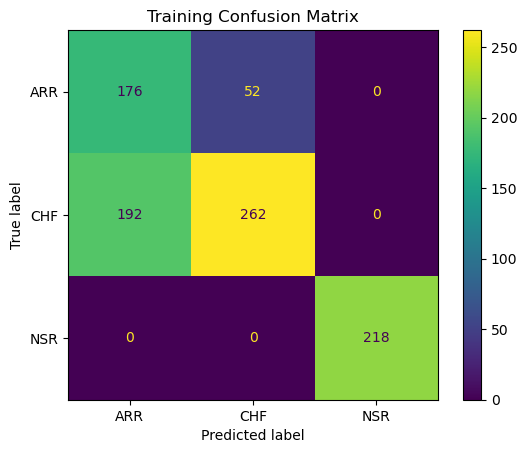

In [52]:
#Only use 3 components, combine CHF and AFF
#change AFF to CHF
y3_train = pd.Series(['CHF' if ele =='AFF' else ele for ele in y_train])
y3_test = pd.Series(['CHF' if ele =='AFF' else ele for ele in y_test])

#expectation-maximization clustering
gmcluster = GaussianMixture(n_components=3, covariance_type='full',n_init = 10).fit(X_train)

#find which numerical labels from clustering go to which cardiac ailment 
yp_train = gmcluster.predict(X_train)
yp_train, label_dict = make_prediction(yp_train, y3_train)
acc = accuracy_score(y3_train,yp_train)
print("Train Accuracy: ", acc)

#make confusion matrix
ConfusionMatrixDisplay.from_predictions(y3_train,yp_train)
plt.title('Training Confusion Matrix')
plt.show

#find test accuracy
yp_test = gmcluster.predict(X_test)
yp_test = [label_dict[ele] for ele in yp_test]
acc_test = accuracy_score(y3_test,yp_test)
print("Test Accuracy: ", acc_test)

#Add details to variables for results table
mod.append("Gaussian Mixture")
mod_desc.append("3 clusters - CHF and AFF combined")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

Unfortunately, it made the Gaussian mixture accuracy worse! Now the model is mixing up CHF and ARR. 

Looking at the visualization below, the clusters are not forming naturally around the actual groups, but are splitting the two upper groups of points (CHF and ARR) between two clusters. 

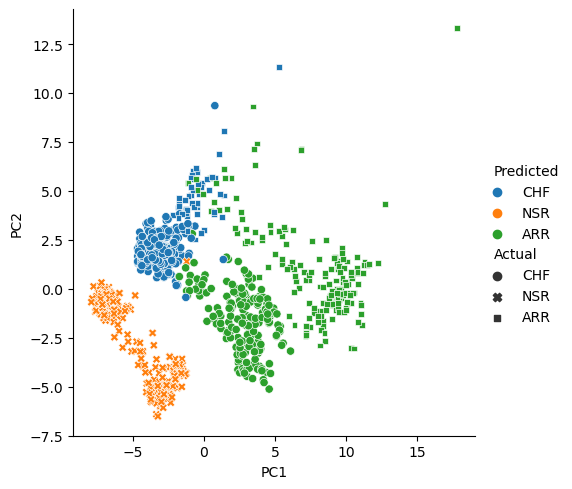

In [53]:
#Put actual and predicted labels into data frame
X2_train['Actual'] = y3_train.values
X2_train['Predicted'] = yp_train

#Plot the top 2 PCs and shape and color based on labels
sns.relplot(data = X2_train, x = 'PC1', y = 'PC2', hue = 'Predicted', style = 'Actual')

The 3 cluster trial didn't work, but maybe by increasing the number of clusters, the models will be able to differentiate with more detail and be more accurate seperating the groups. For this trial, we will use 8 clusters and make an assumption that each ailment will be represented by 2 clusters. We will check this assumption with the visualization of the two PCA components with the actual and predicted labels (same visualization as above). 

{0: 'CHF', 1: 'ARR', 2: 'NSR', 3: 'AFF', 4: 'NSR', 5: 'CHF', 6: 'ARR', 7: 'AFF'}
Train Accuracy:  0.8066666666666666
Test Accuracy:  0.84


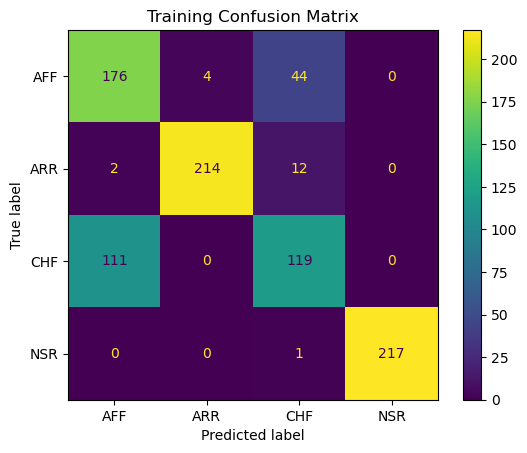

In [54]:
#use 8 clusters
#expectation-maximization clustering
gmcluster = GaussianMixture(n_components=8, covariance_type='full',n_init = 10).fit(X_train)

#find which numerical labels from clustering go to which cardiac ailment 
yp_train = gmcluster.predict(X_train)

i = 0
high_acc = 0
high_perm = None
ytdf = y_train
yp=yp_train

#get unique categories
categories =  ytdf.unique().tolist()

#go through all permutations of categories
#with assumption that each category/ailment corresponds to 2 clusters
for perm in itertools.permutations(categories*2, len(categories*2)):
    #change prediction to this permutation of values
    yp_perm = [perm[yp[i]] for i in range(len(yp))]

    #check accuracy of the predictions
    accuracy = accuracy_score(ytdf,yp_perm)

    #if accuracy greater than current high_acc, set as new high_acc and perm
    if accuracy > high_acc:
        high_acc = accuracy
        high_perm = perm
        
labelorder = high_perm

#turn labelorder into a dictionary
label_dict = { indx: val for indx, val in enumerate(list(labelorder))}
print(label_dict)

#Get ailment labels for the predicted results for training set
yp_train = [label_dict[ele] for ele in yp]

#get training accuracy score
acc = accuracy_score(y_train,yp_train)
print("Train Accuracy: ", acc)

#find test accuracy
yp_test = gmcluster.predict(X_test)
yp_test = [label_dict[ele] for ele in yp_test]
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#make confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train,yp_train)
plt.title('Training Confusion Matrix')
plt.show

#Add details to variables for results table
mod.append("Gaussian Mixture")
mod_desc.append("8 clusters - 2 per ailment")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

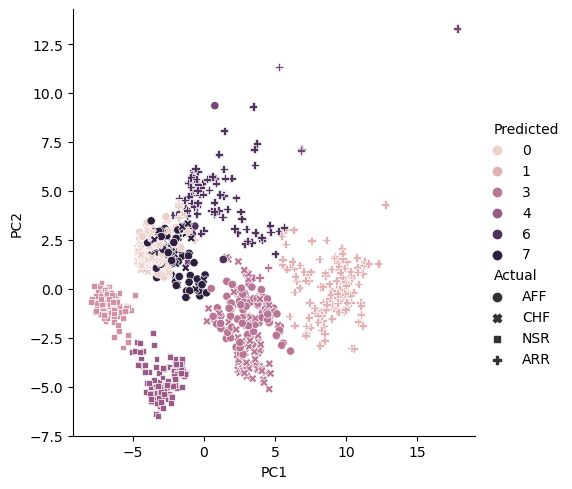

In [55]:
#Put actual and predicted labels into data frame
X2_train['Actual'] = y_train.values
X2_train['Predicted'] = yp

#Plot the top 2 PCs and shape and color based on labels
sns.relplot(data = X2_train, x = 'PC1', y = 'PC2', hue = 'Predicted', style = 'Actual')

The training accuracy increased from 75.7% from the original Gaussian Mixture model to 81% for this one with 8 clusters! The visualization shows that the assumption of 2 clusters per ailment was a valid assumption. NSR and ARR have 2 clusters each, and CHF and AFF are the remaining 4 clusters. This model still has a challenging time differetiating between CHF and AFF, but does a much better job than the orginials at predicting ARR. The error rate for ARR was lowered from the original Gaussian Mixture's error rate of 16.7% to 5.3%.

The chart below shows the counts for each cluster. All the clusters are a reasonable size, except for cluster label 7, which is very small. 

{0: 'CHF', 1: 'ARR', 2: 'NSR', 3: 'AFF', 4: 'NSR', 5: 'CHF', 6: 'ARR', 7: 'AFF'}


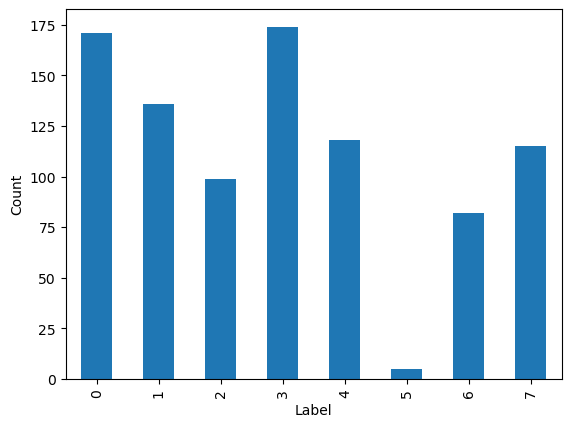

In [56]:
#Make bar chart for counts of each label
pd.Series(yp).value_counts().sort_index(ascending=True).plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Label")
print(label_dict)

# Supervised learning models
We will now build and train a few supervised learning models to see how they compare to the unsupervised learning models. 

Logisitic Regression Train Accuracy:  0.9744444444444444
Test Accuracy:  0.9766666666666667


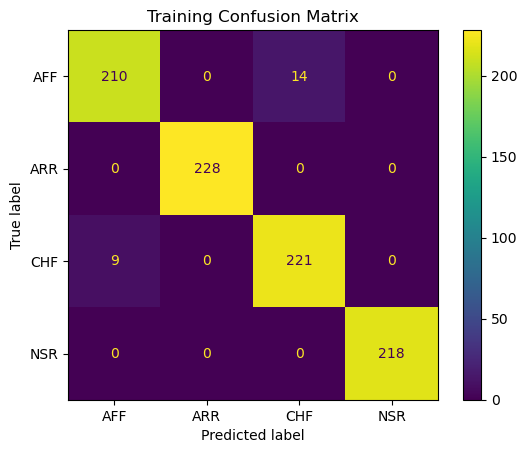

In [57]:
#make logisitc regression classifier
lrclf = LogisticRegression(max_iter = 500)

#fit ligistic regression classifier and check accuracy of train data
lrclf.fit(X_train, y_train)
acc = lrclf.score(X_train,y_train)
print("Logisitic Regression Train Accuracy: ",acc)

#check accuracy of test data
yp_test = lrclf.predict(X_test)
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#make confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train,lrclf.predict(X_train))
plt.title('Training Confusion Matrix')
plt.show

#Add details to variables for results table
mod.append("Logistic Regression")
mod_desc.append("")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

In [58]:
#make random forest classifier
#Do cross-validation on various paramter values
rfclf = RandomForestClassifier()

#set parameter values to trial
max_features = ['sqrt', None]
max_depth = [16,32, None]
min_samples_leaf = [2,4,8]
parameters = {'max_features': max_features, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf}
    
#do gridsearch
grid = GridSearchCV(rfclf, parameters, verbose = 1)
grid.fit(X_train, y_train)

#print best combination and cv accuracy
print("The best combination of parameters is: " + str(grid.best_params_))

#check accuracy of train data
acc = grid.score(X_train,y_train)
print("Random Forest Train Accuracy: ", acc)

#check accuracy of test data
yp_test = grid.predict(X_test)
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#Add details to variables for results table
mod.append("Random Forest")
mod_desc.append("")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best combination of parameters is: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2}
Random Forest Train Accuracy:  1.0
Test Accuracy:  0.9866666666666667


In [59]:
#get variable importance
feature_list = list(X_test.columns)
# Get numerical feature importances
bestrfclf = grid.best_estimator_
importances = list(bestrfclf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: NNTot                Importance: 0.14
Variable: IBIM                 Importance: 0.11
Variable: RTdis                Importance: 0.08
Variable: QTdis                Importance: 0.07
Variable: STdis                Importance: 0.06
Variable: PPmean               Importance: 0.04
Variable: PTdis                Importance: 0.04
Variable: SToffdis             Importance: 0.04
Variable: RRTot                Importance: 0.04
Variable: Pseg                 Importance: 0.03
Variable: RRmean               Importance: 0.03
Variable: PonToffdis           Importance: 0.03
Variable: IBISD                Importance: 0.03
Variable: RMSSD                Importance: 0.03
Variable: PonTdis              Importance: 0.02
Variable: PToffdis             Importance: 0.02
Variable: RToffdis             Importance: 0.02
Variable: hbpermin             Importance: 0.01
Variable: QTseg                Importance: 0.01
Variable: STseg                Importance: 0.01
Variable: Tseg                 Importanc

In [60]:
#make gradient boosting classifier
#Do cross-validation on various paramter values
gbclf = GradientBoostingClassifier()

#set parameter values to trial
max_features = ['sqrt']
max_depth = [16,32]
min_samples_leaf = [4,8]
learning_rate = [0.1,1]

parameters = {'max_features': max_features, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf,
             'learning_rate':learning_rate}

#do gridsearch
grid = GridSearchCV(gbclf, parameters, verbose = 1)
grid.fit(X_train, y_train)

#print best combination and cv accuracy
print("The best combination of parameters is: " + str(grid.best_params_))

#check accuracy of train data
acc = grid.score(X_train,y_train)
print("Gradient Boosting Train Accuracy: ", acc)

#get predictions for visualization below
yp_train = grid.predict(X_train)

#check accuracy of test data
yp_test = grid.predict(X_test)
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#Add details to variables for results table
mod.append("Gradient Boosting")
mod_desc.append("")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
The best combination of parameters is: {'learning_rate': 0.1, 'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 4}
Gradient Boosting Train Accuracy:  1.0
Test Accuracy:  0.9966666666666667


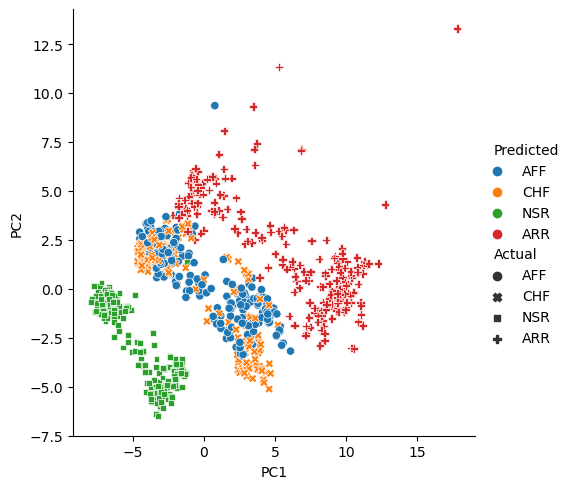

In [61]:
#Put actual and predicted labels into data frame
X2_train['Actual'] = y_train.values
X2_train['Predicted'] = yp_train

#Plot the top 2 PCs and shape and color based on labels
sns.relplot(data = X2_train, x = 'PC1', y = 'PC2', hue = 'Predicted', style = 'Actual')

In [62]:
#Make SVM classifier model
#Do cross-validation on various kernel, C, and gamma paramter values
svm = SVC()

#set parameter values to trial
kernel = ['linear','poly','rbf','sigmoid']
C = np.logspace(-5, 5, 11, base=2)
gamma = np.logspace(-5, 5, 11, base=2)
parameters = {'C': C, 'gamma' : gamma, 'kernel' : kernel}

#do gridsearch and fit best model
grid = GridSearchCV(svm, parameters)
grid.fit(X_train, y_train)

#print best combination
print("The best combination of parameters is: " + str(grid.best_params_))

#check accuracy of train data
acc = grid.score(X_train,y_train)
print("Support Vector Classifier Train Accuracy: ", acc)

#check accuracy of test data
yp_test = grid.predict(X_test)
acc_test = accuracy_score(y_test,yp_test)
print("Test Accuracy: ", acc_test)

#Add details to variables for results table
mod.append("Support Vector Classifier")
mod_desc.append("")
mod_train_acc.append(acc)
mod_test_acc.append(acc_test)

The best combination of parameters is: {'C': 16.0, 'gamma': 0.0625, 'kernel': 'rbf'}
Support Vector Classifier Train Accuracy:  0.9988888888888889
Test Accuracy:  0.99


All the supervised learning models had very good results. The visualization above shows the gradient boosting model is able to accurately differentiate all the different ailments.  

# Results

In [63]:
#Make table of all the metric results for the different models
results = pd.DataFrame(list(zip(mod, mod_desc, mod_train_acc,mod_test_acc)), 
                       columns = ['Model', 'Description','Train Accuracy', 'Test Accuracy'])
results

,Model,Description,Train Accuracy,Test Accuracy
0,Hierarchical Clustering,Original,0.666000,N/A
1,K-Means Clustering,Original,0.678889,0.68
2,Gaussian Mixture,Original,0.756667,0.763333
3,Non-negative Matrix Factorization,Original,0.572222,0.54
4,Gaussian Mixture,Dimensionality Reduction - PCA,0.494444,0.516667
5,K-Means Clustering,Dimensionality Reduction - PCA,0.678889,0.68
6,Gaussian Mixture,3 clusters - CHF and AFF combined,0.728889,0.723333
7,Gaussian Mixture,8 clusters - 2 per ailment,0.806667,0.84
8,Logistic Regression,,0.974444,0.976667
9,Random Forest,,1.000000,0.986667


All the results are in the table above. Of the original Unsupervised models, the Gaussian Mixture performed the best with a train and test accuracy ~76%. We were able to achieve the best unsupervised model by using 8 clusters, with two clusters per ailment. This increased the test accuracy to ~83%. The unsupervised models did a great job identifying NSR, and were poor at differetiating between AFF and CHF.

The supervised learning models all had great results with accuracies over 97%, and performed much better than the unsupervised learning models. This is not surprising since the supervised models have the labels to train to, while the unsupervised models are trying to cluster like objects together. Labels are useful when you have them, but unusupervised models can be powerful tools when there aren't labels available. 

# Resources
Alekhya, L., and P. Rajesh Kumar, "A new approach to detect cardiovascular diseases using ECG scalograms and ML-based CNN algorithm." Mar 20, 2023. International Journal of Computational Vision and Robotics/Inderscience publishers.
DOI: 10.1504/IJCVR.2022.10051429
Link: https://www.inderscience.com/info/ingeneral/forthcoming.php?jcode=IJCVR

Alekhya, L., and P. Rajesh Kumar. "A Novel Application for Autonomous Detection of Cardiac Ailments using ECG
Scalograms with Alex Net Convolution Neural Network." Design Engineering (2021): 13176-13189.
Link: http://www.thedesignengineering.com/index.php/DE/article/view/6434

Autonomous Detection of Cardiac Ailments using Long-short term Memory Model based on Electrocardiogram signals, L. Alekhya, P. Rajesh Kumar, A. Venkata Sriram
DOI: 10.14704/nq.2022.20.7.NQ33431. Pages: 3509 - 3518.
Link: https://www.neuroquantology.com/open-access/Autonomous+Detection+of+Cardiac+Ailments+using+Longshort+term+Memory+Model+based+on+Electrocardiogram+signals_5781/

Autonomous Detection of Cardia Ailments diagnosed by Electrocardiogram using various Supervised Machine Learning AlgorithmsAutonomous Detection of Cardia Ailments diagnosed by Electrocardiogram using various Supervised Machine Learning Algorithms
AMA, Agricultural Mechanization in Asia, Africa and Latin America (ISSN: 00845841) · Sep 18, 2021.
Link: https://www.shin-norinco.com/article/autonomous-detection-of-cardia-ailments-diagnosed-by-electrocardiogram-using-various-supervised-machine-learning-algorithms

L Alekhya, P Rajesh Kumar, “Maximal Overlap Discrete Wavelet Packet Transform Based Characteristic waves detection in Electrocardiogram of Cardiovascular Diseases”, INTERNATIONAL JOURNAL OF SPECIAL EDUCATION, vol 36 (1), pp 51-61, 2021.